<h1 align ='center'> Customer Churn Prediction <h1>

<img src='https://kranthi.me/wp-content/uploads/2020/04/Telecom_Churn_Prediction-e1587281300645.jpg' align='center'>

## Table of Contents

### [1. Introduction](#1)
### [2. Variable Description](#2)
### [3. Importing Librarires](#3)
### [4. Basic Understanding Dataset](#4)
### [5. Exploratory Data Analysis](#5)

<a id=1 > </a>
### 1. Introduction

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

<a id=2 > </a>
### 2. Variable Description

1. **Customer_id** = id number of each customer
2. **Gender** = male or female
3. **SeniorCitizen** = Whether the customer is a senior citizen or not (1, 0)
4. **Partner**=Whether the customer has a partner or not (Yes, No)
5. **Dependents**=Whether the customer has dependents or not (Yes, No)
6. **Tenure**=Number of months the customer has stayed with the company
7. **Phone Service**= Whether the customer has a phone service or not (Yes, No)
8. **MultipleLines**= Whether the customer has multiple lines or not (Yes, No, No phone service)
9. **InternetService**=Customer’s internet service provider (DSL, Fiber optic, No)
10. **OnlineSecurity**=Whether the customer has online security or not (Yes, No, No internet service)
11. **OnlineBackup** = Whether the customer has online backup or not
12. **Device Protection** = Whether the customer hsa device protection or not
13. **TechSupport** = Whether the customer has techsupport or not
14. **StreamingTV** = Whether the customer has Streaming tv or not
15. **StreamingMovies** = Whether the customer has movie or not
16. **Contract** = Contract options for Customer (Month-to month,one year)
17. **PaperlessBilling** = Whether the customer uses paperless bill or not
18. **PaymentMethod** = Payment method customer uses 
19. **MonthlyCharges** = Amount of Monthly Charges
20. **TotalCharges** = Amount of Total Charges
21. **Churn** =  Whether the customer churned or stayed.

<a id=3 > </a>
### 3. Importing Librarires

In [1]:
import pandas as pd # data analysis
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt # data_viz
import seaborn as sns # data_viz
sns.set()
### Config

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


## imbalance problem



### pipeline
from sklearn.pipeline import Pipeline

## Feature Selection
from sklearn.feature_selection import chi2,f_regression,f_classif,mutual_info_classif,mutual_info_regression,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,SelectFromModel

### Machine Learning Model

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


## Metrics
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,f1_score

## Others
## Warning
import warnings
warnings.filterwarnings('ignore')
import pickle

C:\Users\Ugur\anaconda3\envs\Churn_new\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### Reading Dataset

In [2]:
df = pd.read_csv('datasets\churn_data.csv')

<a id=4 > </a>
### 4. Understanding Dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [5]:
cat_cols,num_cols,cat_but_car = grab_col_names(df,cat_th=10,car_th=20)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [6]:
cat_but_car

['customerID', 'TotalCharges']

In [7]:
num_cols

['tenure', 'MonthlyCharges']

- We see that Total Charges categorized as categorical features.We need to change the datatype for TotalCharges column.

In [8]:
# replace blanks with np.nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# convert to float64
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [9]:
cat_cols,num_cols,cat_but_car = grab_col_names(df,cat_th=10,car_th=20)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [10]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

<a id=5 > </a>
### 5. Exploratory Data Analysis

#### 5.1 Categorical Features

In [12]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(col_name)
        plt.show()

        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################


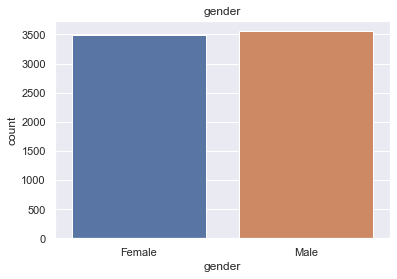

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################


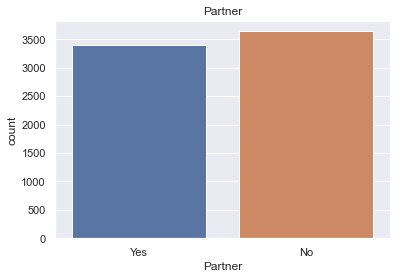

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################


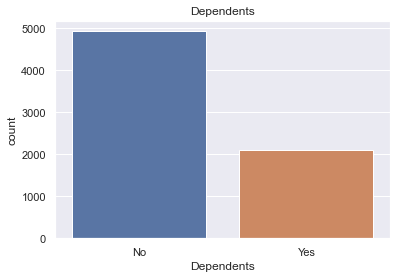

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################


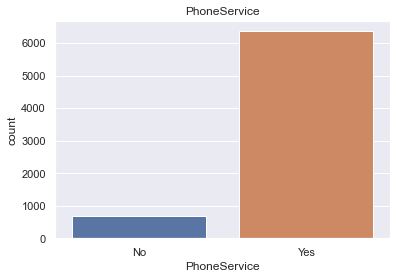

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


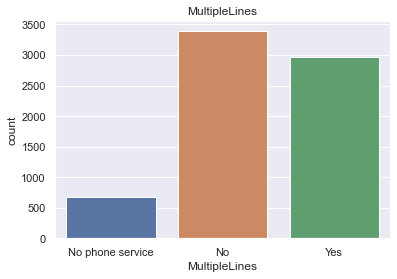

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################


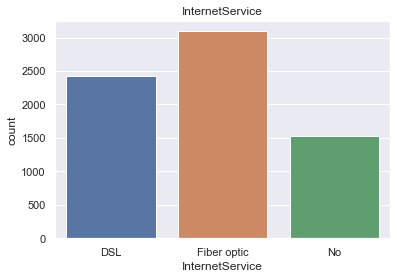

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


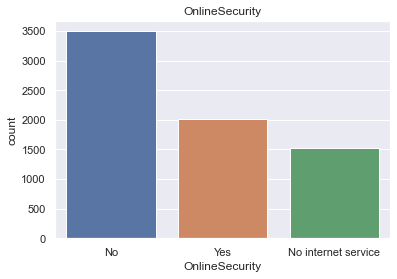

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


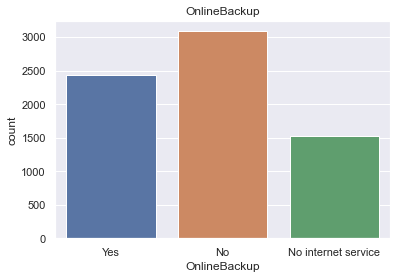

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


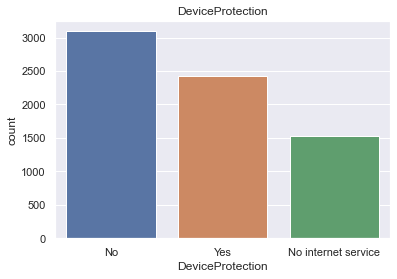

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


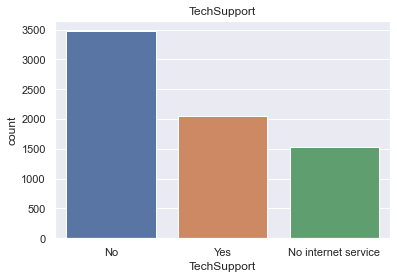

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


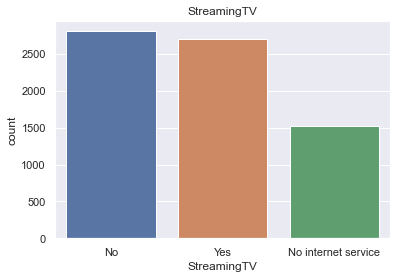

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


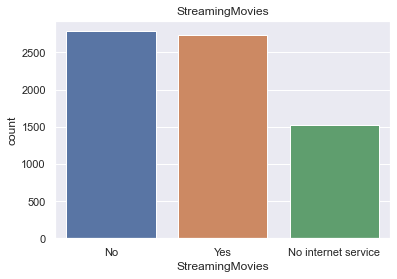

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


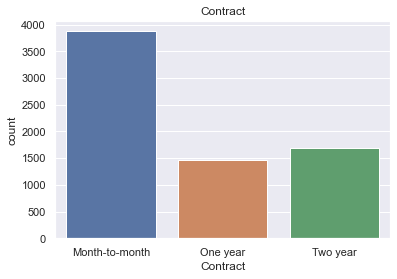

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
##########################################


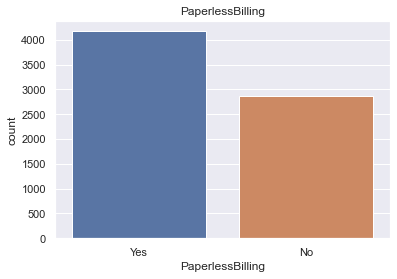

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


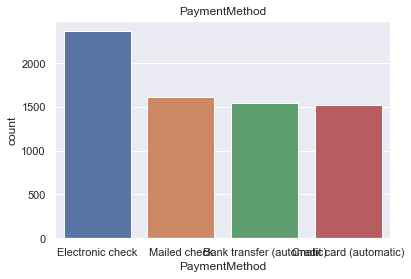

     Churn  Ratio
No    5174 73.463
Yes   1869 26.537
##########################################


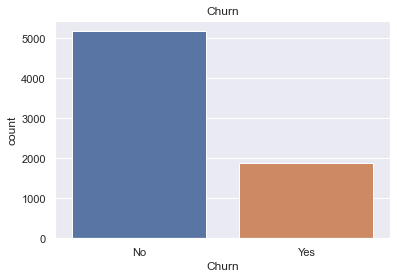

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
##########################################


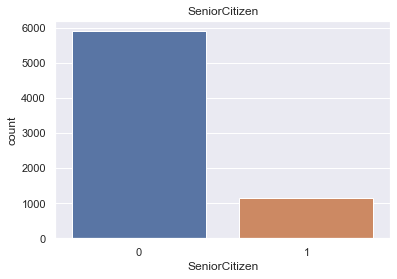

In [13]:
for i in cat_cols:
    cat_summary(df,i,plot=True)

#### 5.2 Numerical Features

In [14]:
def num_summary(dataframe, numerical_col, plot=False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


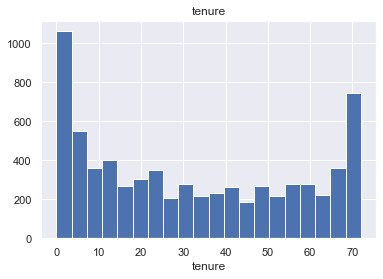

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


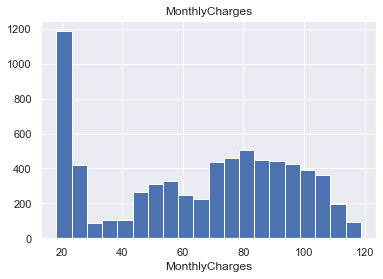

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


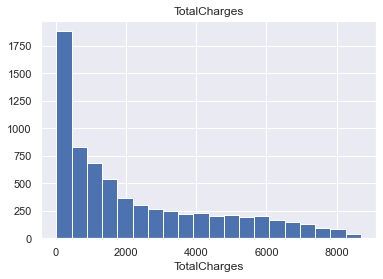

In [15]:
for i in num_cols:
    num_summary(df,i,plot=True)

#### 5.3 Target Analysis with Categorical Columns

In [16]:
#### Converting Target into Numerical Column

In [17]:
df['Churn'] = np.where(df.Churn=='Yes',1,0)

In [18]:
for var in cat_cols:
    target_summary_with_cat(df,'Churn',var,plot=True)

NameError: name 'target_summary_with_cat' is not defined

In [ ]:
for i in cat_cols:
    target_summary_with_cat(df,'Churn',i)

#### 5.4 Target Analysis with Numerical Columns

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [ ]:
for i in num_cols:
    target_summary_with_num(df,'Churn',i)

#### 5.5 Correlation Analysis 

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap='RdBu')
plt.title('Correlation Analysis',fontsize=16)
plt.show()

#### Notes from Correlation Analysis

- MonthlyCharges and Total Charges are highly correlated each other
- TotalCharges and Tenure are highly correlated each other

#### Saving the Dataset

In [ ]:
df.to_csv('datasets\churn_analyzed.csv',index=False)